In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

In [2]:
path = "../vehicle_collisions/data/Collisions.csv"
collisions=pd.read_csv(path)

In [3]:
collisions.head()

,X,Y,objectid,inckey,coldetkey,addrtype,collisiontype,exceptrsncode,exceptrsndesc,fatalities,...,speeding,st_colcode,st_coldesc,status,underinfl,vehcount,weather,seglanekey,crosswalkkey,hitparkedcar
0,-122.322684,47.568514,162245138,26300,26300,Block,Sideswipe,NaN,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,0,2,Clear or Partly Cloudy,0,0,N
1,-122.324008,47.619073,162245139,37000,37000,Block,Parked Car,NaN,NaN,0,...,NaN,32,One Parked - One Moving,Matched,0,2,Clear or Partly Cloudy,0,0,N
2,-122.314148,47.608631,162245140,26200,26200,Block,Rear Ended,NaN,NaN,0,...,NaN,14,From Same Direction - Both Going Straight - On...,Matched,0,2,Overcast,0,0,N
3,NaN,NaN,162245141,36900,36900,Block,Sideswipe,NaN,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,0,2,Clear or Partly Cloudy,0,0,N
4,-122.333961,47.706850,162245142,26100,26100,Intersection,Angles,NaN,NaN,0,...,Y,10,Entering At Angle,Matched,0,2,Overcast,0,0,N


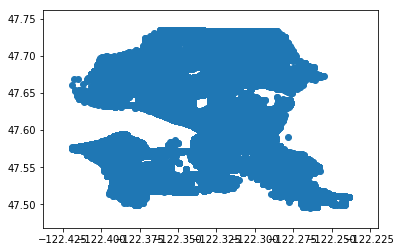

In [4]:
%matplotlib inline
plt.scatter(collisions.X,collisions.Y)

We can verify that our data looks roughly like Seattle.

In [5]:
m = folium.Map(location=[47.706850, -122.333961])

In [6]:
m

There a few different types of maps we could

In [7]:
folium.Map(
    location=[47.706850, -122.333961],
    tiles='OpenStreetMap',
    zoom_start=13
)

In [8]:
m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=13
)

m

Let's add some markers for all sideswipe collisions

In [53]:
df_ss = collisions[(~collisions['X'].isna()) & (~collisions['Y'].isna()) & (collisions['collisiontype']=='Sideswipe')].head(1000)
print('Lenght of df_ss: ',len(df_ss))
df_ss.head()

Lenght of df_ss:  1000


,X,Y,objectid,inckey,coldetkey,addrtype,collisiontype,exceptrsncode,exceptrsndesc,fatalities,...,speeding,st_colcode,st_coldesc,status,underinfl,vehcount,weather,seglanekey,crosswalkkey,hitparkedcar
0,-122.322684,47.568514,162245138,26300,26300,Block,Sideswipe,NaN,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,0,2,Clear or Partly Cloudy,0,0,N
10,-122.339280,47.587507,162245148,25700,25700,Block,Sideswipe,NaN,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,0,2,Clear or Partly Cloudy,0,0,N
18,-122.344997,47.725034,162245156,25200,25200,Block,Sideswipe,NaN,NaN,0,...,NaN,12,From Same Direction -Both Going Straight-One S...,Matched,0,2,Clear or Partly Cloudy,0,0,N
48,-122.335502,47.599622,162245186,28100,28100,Block,Sideswipe,NaN,NaN,0,...,NaN,12,From Same Direction -Both Going Straight-One S...,Matched,0,2,Clear or Partly Cloudy,0,0,N
65,-122.337394,47.612665,162245203,30100,30100,Intersection,Sideswipe,NaN,NaN,0,...,NaN,11,From Same Direction -Both Going Straight-Both ...,Matched,0,2,Raining,0,0,N


In [21]:
m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=11
)

for i in range(0,len(df_ss)):
    folium.Marker(
        location=[df_ss.iloc[i]['Y'],df_ss.iloc[i]['X']],
        popup=df_ss.iloc[i]['incdttm']
    ).add_to(m)

In [15]:
m

This looks busy. Fortunately, there are plugins to help us cluster markers.

In [55]:
from folium import plugins

m = folium.Map(
    location=[47.6, -122.333961],
    tiles='Stamen Toner',
    zoom_start=11
)

df_ss['Range']=range(0,1000)
data = df_ss[['Y','X','Range']].as_matrix()


plugins.MarkerCluster(data).add_to(m)

m

That's cool!